# Distribuciones en forma de anillo

In [4]:
from math import sin, cos, radians, pi, sqrt
import numpy.random as rnd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
def ring(r_min = 0, r_max = 1, n_samples = 360):
    angle = rnd.uniform(0, 2*pi, n_samples)
    distance = rnd.uniform(r_min, r_max, n_samples)
    data = []
    for a, d in zip(angle,distance):
        data.append([d*cos(a), d*sin(a)])
    return np.array(data)

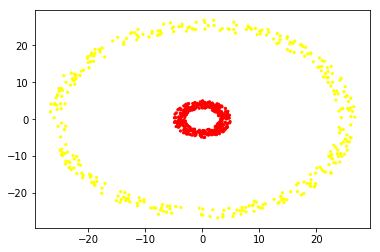

In [13]:
data1 = ring(3,5)
data2 = ring(24,27)

data = np.concatenate([data1,data2], axis = 0)
labels = np.concatenate([[0 for i in range(0,len(data1))], [1 for i in range(0,len(data2))]])

plt.scatter(data[:,0], data[:,1], c=labels, s=5, cmap="autumn")


# Algoritmo con Kmeans

In [14]:
from sklearn.cluster import KMeans

In [15]:
km = KMeans(2).fit(data)

In [17]:
clust = km.predict(data)

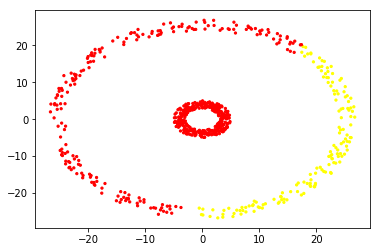

In [18]:
plt.scatter(data[:,0], data[:,1], c=clust, s=5, cmap="autumn")